1. Importing the Necessary Libraries and Modules

In [25]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

2. Importing the Dataset

In [4]:
dataset = pd.read_csv("./Classification Dataset.csv")

3. Checking the Class Density

In [5]:
dataset['claim_status'].value_counts()

claim_status
0    54844
1     3748
Name: count, dtype: int64

4. Dropping the Unused Features

In [6]:
dataset = dataset.drop(["region_code", "segment", "model", "policy_id"], axis=1)

5. Getting the Information about the Dataset

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   subscription_length               58592 non-null  float64
 1   vehicle_age                       58592 non-null  float64
 2   customer_age                      58592 non-null  int64  
 3   region_density                    58592 non-null  int64  
 4   fuel_type                         58592 non-null  object 
 5   max_torque                        58592 non-null  object 
 6   max_power                         58592 non-null  object 
 7   engine_type                       58592 non-null  object 
 8   airbags                           58592 non-null  int64  
 9   is_esc                            58592 non-null  object 
 10  is_adjustable_steering            58592 non-null  object 
 11  is_tpms                           58592 non-null  object 
 12  is_p

In [8]:
dataset["fuel_type"]

0        Diesel
1        Diesel
2        Diesel
3           CNG
4        Diesel
          ...  
58587    Petrol
58588    Diesel
58589    Petrol
58590    Petrol
58591    Petrol
Name: fuel_type, Length: 58592, dtype: object

6. Getting the Information about the Features

In [9]:
# Get numeric and non-numeric columns
numeric_features = dataset.select_dtypes(include=["int64", "float64"]).columns.tolist()
non_numeric_features = dataset.select_dtypes(
    exclude=["int64", "float64"]
).columns.tolist()

# Display the lists
print("Numeric Features:", numeric_features)
print("Non-Numeric Features:", non_numeric_features)

Numeric Features: ['subscription_length', 'vehicle_age', 'customer_age', 'region_density', 'airbags', 'displacement', 'cylinder', 'turning_radius', 'length', 'width', 'gross_weight', 'ncap_rating', 'claim_status']
Non-Numeric Features: ['fuel_type', 'max_torque', 'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']


7. Extracting the Feature

In [10]:
dataset["max_torque_Nm"] = dataset["max_torque"].str.extract(r"(\d+)Nm").astype(float)
dataset["max_torque_rpm"] = dataset["max_torque"].str.extract(r"@(\d+)rpm").astype(float)
dataset["max_power_bhp"] = dataset["max_power"].str.extract(r"(\d+)bhp").astype(float)
dataset["max_power_rpm"] = dataset["max_power"].str.extract(r"@(\d+)rpm").astype(float)
dataset = dataset.drop(["max_torque", "max_power"] , axis = 1)

8. Encoding the Categorical Feature

In [11]:
dummies = pd.get_dummies(dataset["engine_type"], dtype=int)
dataset = pd.concat([dataset, dummies], axis="columns")
dataset = dataset.drop("engine_type", axis="columns")
dataset

,subscription_length,vehicle_age,customer_age,region_density,fuel_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,...,1.2 L K Series Engine,1.2 L K12N Dualjet,1.5 L U2 CRDi,1.5 Turbocharged Revotorq,1.5 Turbocharged Revotron,F8D Petrol Engine,G12B,K Series Dual jet,K10C,i-DTEC
0,9.3,1.2,41,8794,Diesel,6,Yes,Yes,Yes,Yes,...,0,0,1,0,0,0,0,0,0,0
1,8.2,1.8,35,27003,Diesel,2,No,Yes,No,Yes,...,0,0,0,0,0,0,0,0,0,1
2,9.5,0.2,44,8794,Diesel,6,Yes,Yes,Yes,Yes,...,0,0,1,0,0,0,0,0,0,0
3,5.2,0.4,44,73430,CNG,2,No,No,No,Yes,...,0,0,0,0,0,1,0,0,0,0
4,10.1,1.0,56,5410,Diesel,2,No,Yes,No,Yes,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,10.6,2.6,48,34738,Petrol,2,No,Yes,No,Yes,...,0,0,0,0,0,0,0,1,0,0
58588,2.3,2.2,37,4076,Diesel,6,Yes,Yes,Yes,Yes,...,0,0,1,0,0,0,0,0,0,0
58589,6.6,2.2,35,8794,Petrol,2,No,Yes,No,Yes,...,0,0,0,0,0,0,0,1,0,0
58590,4.1,3.6,44,8794,Petrol,2,No,Yes,No,Yes,...,0,0,0,0,0,0,0,1,0,0


In [12]:
dummies = pd.get_dummies(dataset["fuel_type"], dtype=int)
dataset = pd.concat([dataset, dummies], axis="columns")
dataset = dataset.drop("fuel_type", axis="columns")
dataset

,subscription_length,vehicle_age,customer_age,region_density,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,...,1.5 Turbocharged Revotorq,1.5 Turbocharged Revotron,F8D Petrol Engine,G12B,K Series Dual jet,K10C,i-DTEC,CNG,Diesel,Petrol
0,9.3,1.2,41,8794,6,Yes,Yes,Yes,Yes,Yes,...,0,0,0,0,0,0,0,0,1,0
1,8.2,1.8,35,27003,2,No,Yes,No,Yes,Yes,...,0,0,0,0,0,0,1,0,1,0
2,9.5,0.2,44,8794,6,Yes,Yes,Yes,Yes,Yes,...,0,0,0,0,0,0,0,0,1,0
3,5.2,0.4,44,73430,2,No,No,No,Yes,No,...,0,0,1,0,0,0,0,1,0,0
4,10.1,1.0,56,5410,2,No,Yes,No,Yes,No,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,10.6,2.6,48,34738,2,No,Yes,No,Yes,No,...,0,0,0,0,1,0,0,0,0,1
58588,2.3,2.2,37,4076,6,Yes,Yes,Yes,Yes,Yes,...,0,0,0,0,0,0,0,0,1,0
58589,6.6,2.2,35,8794,2,No,Yes,No,Yes,No,...,0,0,0,0,1,0,0,0,0,1
58590,4.1,3.6,44,8794,2,No,Yes,No,Yes,No,...,0,0,0,0,1,0,0,0,0,1


In [13]:
dummies = pd.get_dummies(dataset["steering_type"], dtype=int)
dataset = pd.concat([dataset, dummies], axis="columns")
dataset = dataset.drop("steering_type", axis="columns")
dataset

,subscription_length,vehicle_age,customer_age,region_density,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,...,G12B,K Series Dual jet,K10C,i-DTEC,CNG,Diesel,Petrol,Electric,Manual,Power
0,9.3,1.2,41,8794,6,Yes,Yes,Yes,Yes,Yes,...,0,0,0,0,0,1,0,0,0,1
1,8.2,1.8,35,27003,2,No,Yes,No,Yes,Yes,...,0,0,0,1,0,1,0,1,0,0
2,9.5,0.2,44,8794,6,Yes,Yes,Yes,Yes,Yes,...,0,0,0,0,0,1,0,0,0,1
3,5.2,0.4,44,73430,2,No,No,No,Yes,No,...,0,0,0,0,1,0,0,0,0,1
4,10.1,1.0,56,5410,2,No,Yes,No,Yes,No,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,10.6,2.6,48,34738,2,No,Yes,No,Yes,No,...,0,1,0,0,0,0,1,1,0,0
58588,2.3,2.2,37,4076,6,Yes,Yes,Yes,Yes,Yes,...,0,0,0,0,0,1,0,0,0,1
58589,6.6,2.2,35,8794,2,No,Yes,No,Yes,No,...,0,1,0,0,0,0,1,1,0,0
58590,4.1,3.6,44,8794,2,No,Yes,No,Yes,No,...,0,1,0,0,0,0,1,1,0,0


9. Encoding the Binary Features

In [14]:
non_numeric_features = [
    "is_esc",
    "is_adjustable_steering",
    "is_tpms",
    "is_parking_sensors",
    "is_parking_camera",
    "rear_brakes_type",
    "transmission_type",
    "is_front_fog_lights",
    "is_rear_window_wiper",
    "is_rear_window_washer",
    "is_rear_window_defogger",
    "is_brake_assist",
    "is_power_door_locks",
    "is_central_locking",
    "is_power_steering",
    "is_driver_seat_height_adjustable",
    "is_day_night_rear_view_mirror",
    "is_ecw",
    "is_speed_alert",
]



In [15]:
for feature in non_numeric_features:
    encoder = LabelEncoder()
    dataset[feature] = encoder.fit_transform(dataset[feature])

dataset

,subscription_length,vehicle_age,customer_age,region_density,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,...,G12B,K Series Dual jet,K10C,i-DTEC,CNG,Diesel,Petrol,Electric,Manual,Power
0,9.3,1.2,41,8794,6,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,1
1,8.2,1.8,35,27003,2,0,1,0,1,1,...,0,0,0,1,0,1,0,1,0,0
2,9.5,0.2,44,8794,6,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,1
3,5.2,0.4,44,73430,2,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,10.1,1.0,56,5410,2,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,10.6,2.6,48,34738,2,0,1,0,1,0,...,0,1,0,0,0,0,1,1,0,0
58588,2.3,2.2,37,4076,6,1,1,1,1,1,...,0,0,0,0,0,1,0,0,0,1
58589,6.6,2.2,35,8794,2,0,1,0,1,0,...,0,1,0,0,0,0,1,1,0,0
58590,4.1,3.6,44,8794,2,0,1,0,1,0,...,0,1,0,0,0,0,1,1,0,0


10. Scaling the Features

In [16]:
def remove_outliers(df, column):
    z_scores = stats.zscore(df[column])
    filtered_df = df[(z_scores <= 3.4) & (z_scores >= -3.4)]

    return filtered_df

In [17]:
features_to_be_scaled = ["subscription_length","vehicle_age","customer_age","region_density","airbags"]

for feature in features_to_be_scaled:
    dataset = remove_outliers(dataset , feature)

11. Spliting the Input and Output Feature

In [18]:
X = dataset.drop("claim_status" , axis=1)
Y = dataset["claim_status"]

12. Balancing the Imbalanced Dataset

In [19]:
smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_resample(X, Y)

y_sm.value_counts()

claim_status
0    54614
1    54614
Name: count, dtype: int64

13. Spliting the Training and Testing Data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

14. Model Building

In [21]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    # "Support Vector Machine": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM Classifier": LGBMClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
}

# Prepare a DataFrame to store the results
results = []

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    # Fit the model
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results in the DataFrame
    results.append(
        {
            "Classifier": name,
            "Accuracy": accuracy,
            "Precision": report["weighted avg"]["precision"],
            "Recall": report["weighted avg"]["recall"],
            "F1-Score": report["weighted avg"]["f1-score"],
            "Support": report["weighted avg"]["support"],
        }
    )

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the results to an Excel file
results_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True).to_excel(
    "classification_reports.xlsx", index=False
)

print("Classification reports saved to 'classification_reports.xlsx'")

results_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)

c:\Users\Aaryan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Aaryan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:07:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 43691, number of negative: 43691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2842
[LightGBM] [Info] Number of data points in the train set: 87382, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classification reports saved to 'classification_reports.xlsx'


,Classifier,Accuracy,Precision,Recall,F1-Score,Support
0,LightGBM Classifier,0.928637,0.933101,0.928637,0.928452,21846.0
1,Decision Tree Classifier,0.921679,0.921760,0.921679,0.921675,21846.0
2,XGBoost Classifier,0.911242,0.916603,0.911242,0.910956,21846.0
3,Gradient Boosting Classifier,0.904605,0.908136,0.904605,0.904398,21846.0
4,Random Forest Classifier,0.901538,0.901565,0.901538,0.901536,21846.0
5,K-Nearest Neighbors,0.795661,0.808471,0.795661,0.793517,21846.0
6,Logistic Regression,0.571821,0.572201,0.571821,0.571257,21846.0
7,Gaussian Naive Bayes,0.570722,0.571876,0.570722,0.568992,21846.0
8,Bernoulli Naive Bayes,0.517257,0.518285,0.517257,0.510375,21846.0
9,Multinomial Naive Bayes,0.508377,0.508802,0.508377,0.502361,21846.0


In [22]:
results

[{'Classifier': 'Logistic Regression',
  'Accuracy': 0.5718209283163966,
  'Precision': 0.5722005113297493,
  'Recall': 0.5718209283163966,
  'F1-Score': 0.5712574163728921,
  'Support': 21846.0},
 {'Classifier': 'K-Nearest Neighbors',
  'Accuracy': 0.7956605328206536,
  'Precision': 0.8084714870563988,
  'Recall': 0.7956605328206536,
  'F1-Score': 0.7935166976135812,
  'Support': 21846.0},
 {'Classifier': 'Decision Tree Classifier',
  'Accuracy': 0.9216790259086332,
  'Precision': 0.921759625906562,
  'Recall': 0.9216790259086332,
  'F1-Score': 0.9216752838648418,
  'Support': 21846.0},
 {'Classifier': 'Random Forest Classifier',
  'Accuracy': 0.9015380390002746,
  'Precision': 0.9015646984802054,
  'Recall': 0.9015380390002746,
  'F1-Score': 0.9015364047752975,
  'Support': 21846.0},
 {'Classifier': 'Gradient Boosting Classifier',
  'Accuracy': 0.9046049620067746,
  'Precision': 0.9081360497166745,
  'Recall': 0.9046049620067746,
  'F1-Score': 0.9043981814450123,
  'Support': 21846.0

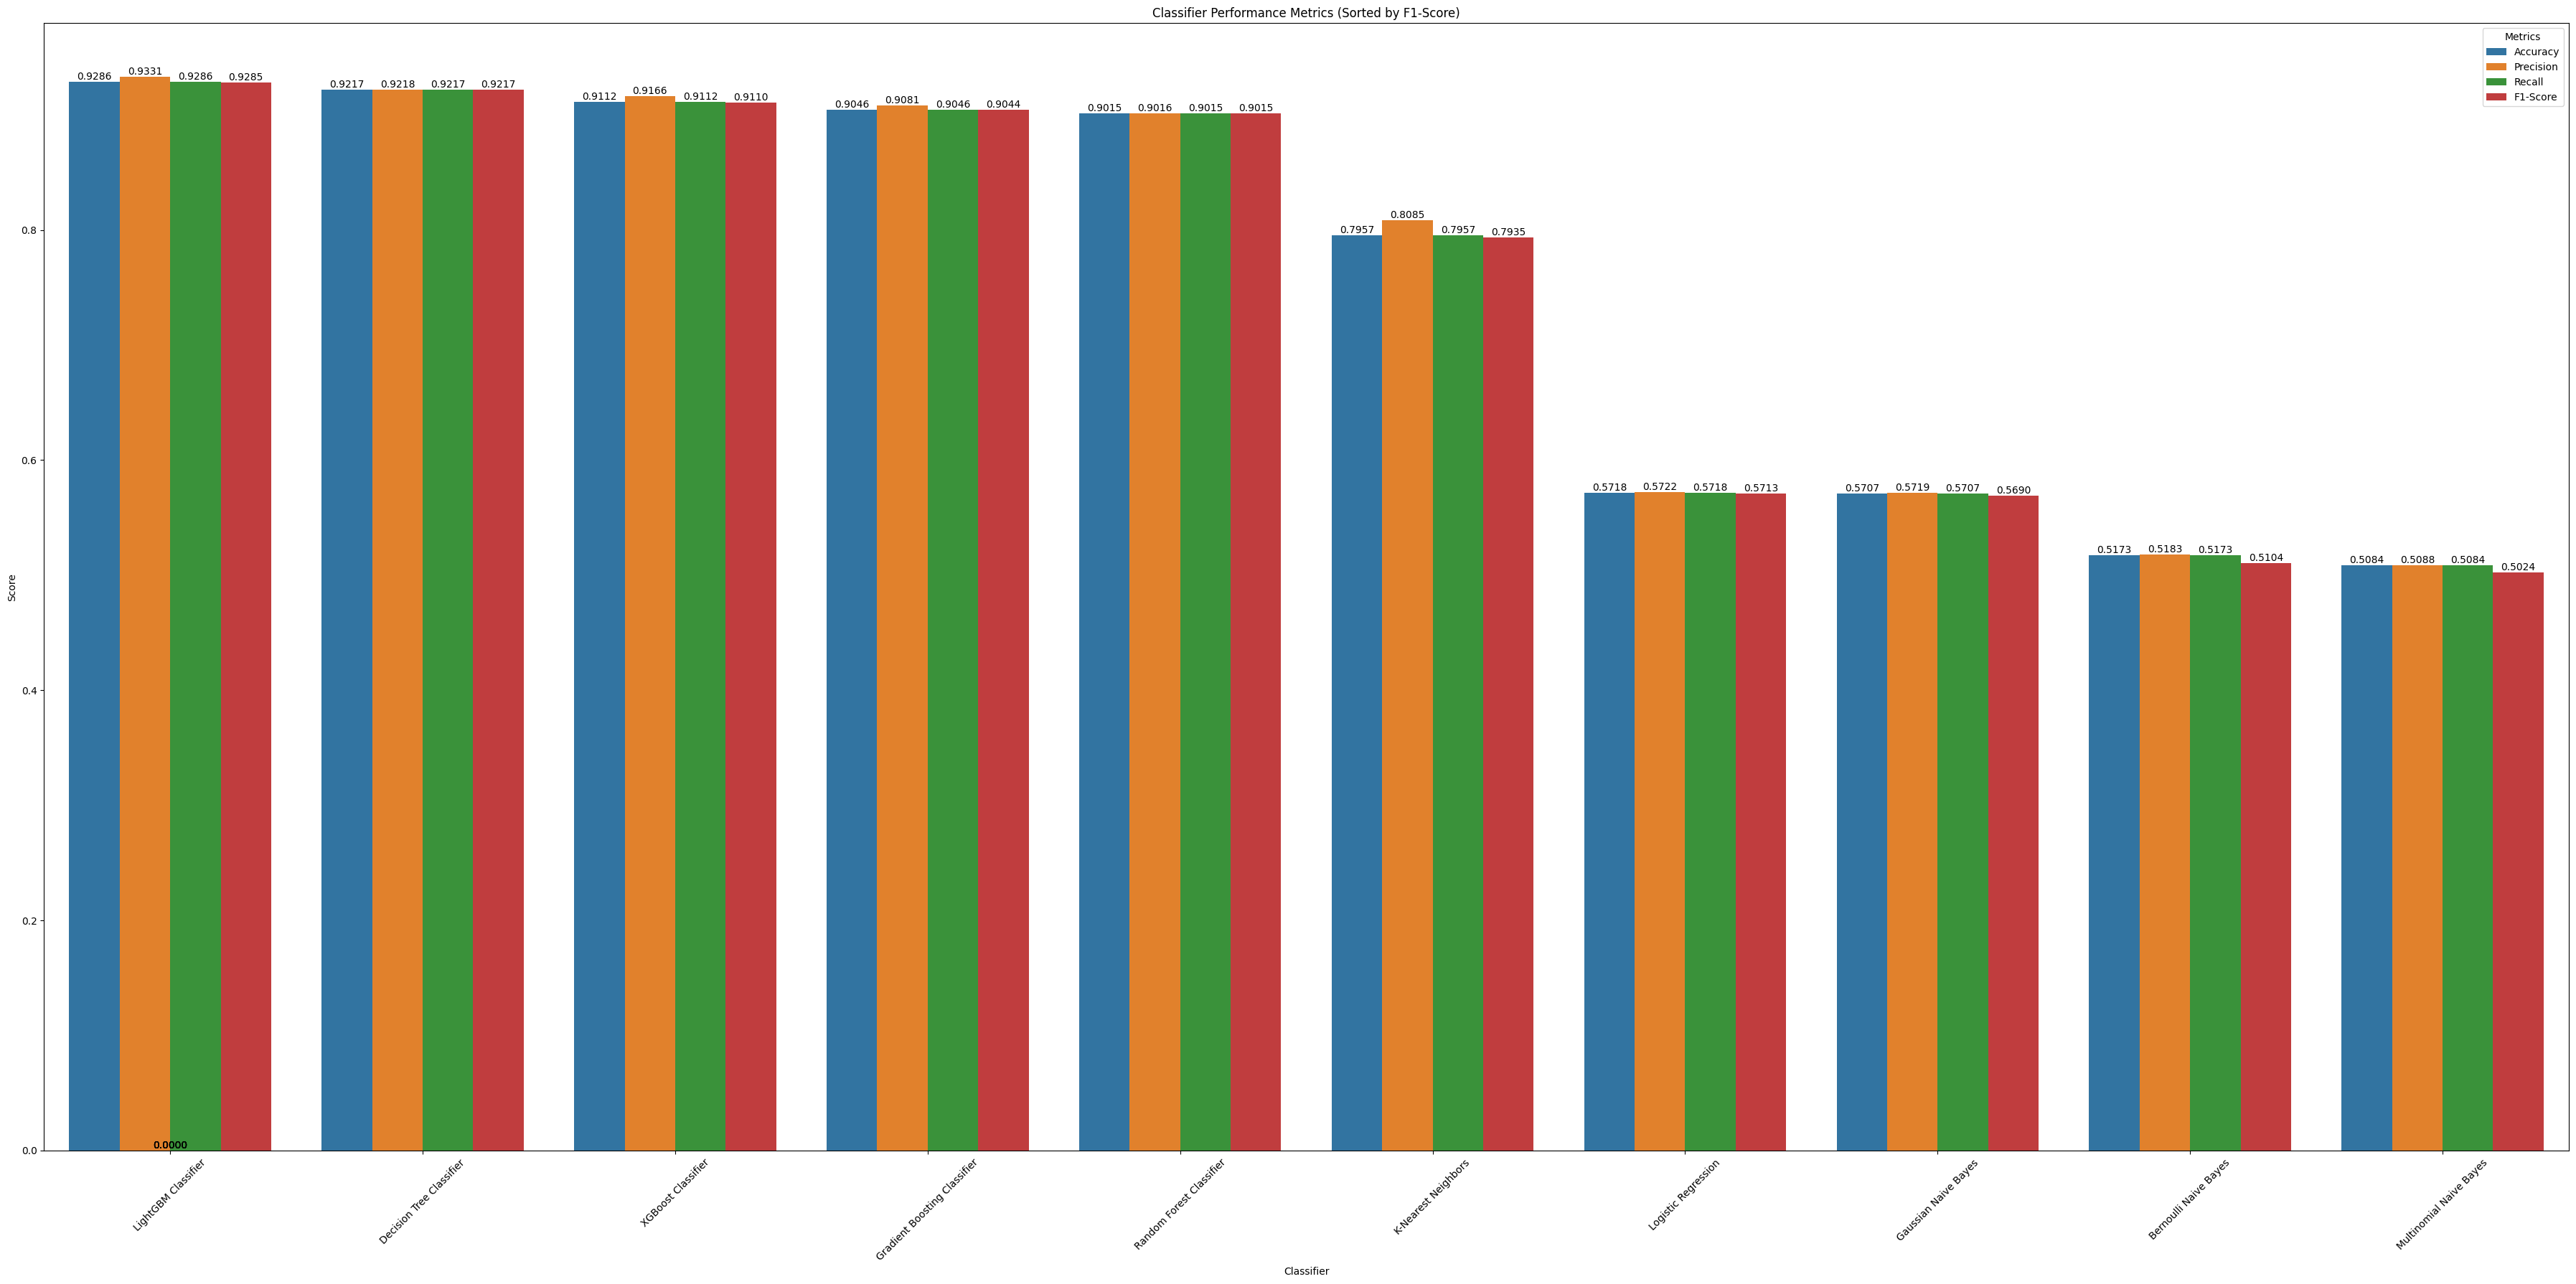

In [34]:
# Melt the DataFrame for seaborn
results_melted = results_df.melt(
    id_vars="Classifier",
    value_vars=["Accuracy", "Precision", "Recall", "F1-Score"],
    var_name="Metric",
    value_name="Score",
)

# Filter and sort by F1-Score
f1_scores = results_df[["Classifier", "F1-Score"]].sort_values(
    by="F1-Score", ascending=False
)

# Create a new DataFrame for the sorted F1-Score
sorted_results = (
    results_df.set_index("Classifier").loc[f1_scores["Classifier"]].reset_index()
)

# Melt the sorted results DataFrame for seaborn
sorted_results_melted = sorted_results.melt(
    id_vars="Classifier",
    value_vars=["Accuracy", "Precision", "Recall", "F1-Score"],
    var_name="Metric",
    value_name="Score",
)

# Set the figure size
plt.figure(figsize=(36, 18))

# Create the bar plot
ax = sns.barplot(data=sorted_results_melted, x="Classifier", y="Score", hue="Metric")

# Set title and labels
plt.title("Classifier Performance Metrics (Sorted by F1-Score)")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.xlabel("Classifier")

# Show the legend
plt.legend(title="Metrics")

# Adding data labels on top of the bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.4f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
    )

# Show the plot
plt.tight_layout()
plt.show()